In [1]:
import os
for filenames in os.listdir('input/'):
    print(os.path.join("input/", filenames))

input/.DS_Store
input/test
input/train
input/validation


**Importing necessary packages**

In [2]:
import numpy as np 
import pandas as pd

import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import matplotlib.pyplot as plt

In [3]:
base_dir = os.path.join("input")
print("Base directory --> ", os.listdir(base_dir))

Base directory -->  ['.DS_Store', 'test', 'train', 'validation']


**Defining dataset path**

In [4]:
# Train set
train_dir = os.path.join("input/train/")
print("Train --> ", os.listdir(train_dir))

# Test set
test_dir = os.path.join("input/test/")
print("Test --> ", os.listdir(test_dir))

# Validation set
validation_dir = os.path.join("input/validation/")
print("Validation --> ", os.listdir(validation_dir)[:5])

Train -->  ['paper', '.DS_Store', 'rock', 'scissors']
Test -->  ['paper', '.DS_Store', 'rock', 'scissors']
Validation -->  ['scissors-hires1.png', 'scissors-hires2.png', 'rock3.png', 'paper4.png', 'paper5.png']


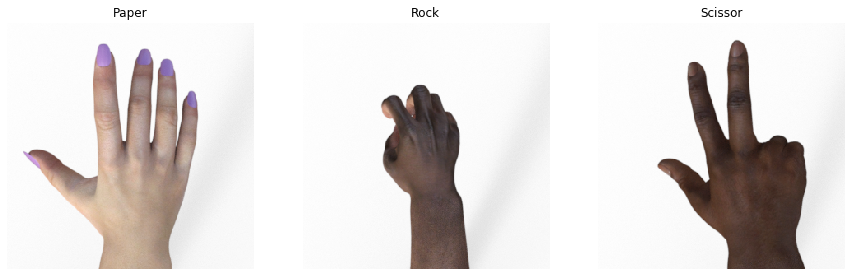

In [5]:
# Displaying random image from the dataset

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sample_paper = random.choice(os.listdir(train_dir + "paper"))
image = load_img(train_dir + "paper/" + sample_paper)
ax[0].imshow(image)
ax[0].set_title("Paper")
ax[0].axis("Off")

sample_rock = random.choice(os.listdir(train_dir + "rock"))
image = load_img(train_dir + "rock/" + sample_rock)
ax[1].imshow(image)
ax[1].set_title("Rock")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + "scissors"))
image = load_img(train_dir + "scissors/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("Scissor")
ax[2].axis("Off")

plt.show()

**Defining the CNN model**

In [6]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

**Callback Function**

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.98):
            print("\nReached >98% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

**Training Generator with Image Augmentation**

In [10]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2, # Shifting image width by 20%
      height_shift_range=0.2,# Shifting image height by 20%
      shear_range=0.2,       # Rotation across X-axis by 20%
      zoom_range=0.2,        # Image zooming by 20%
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 2520 images belonging to 3 classes.


**Validation Generator**

In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 372 images belonging to 3 classes.


**Model Fitting**

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = np.ceil(2520/20),  # 2520 images = batch_size * steps
      epochs = 10,
      validation_data=validation_generator,
      validation_steps = np.ceil(372/20),  # 372 images = batch_size * steps
      callbacks=[callbacks],
      verbose = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
126/126 - 39s - loss: 1.0937 - accuracy: 0.3810 - val_loss: 0.9339 - val_accuracy: 0.5376
Epoch 2/10
126/126 - 37s - loss: 0.6729 - accuracy: 0.6972 - val_loss: 0.2008 - val_accuracy: 0.9435
Epoch 3/10
126/126 - 37s - loss: 0.3078 - accuracy: 0.8849 - val_loss: 0.0840 - val_accuracy: 0.9651
Epoch 4/10
126/126 - 38s - loss: 0.1936 - accuracy: 0.9313 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 5/10
126/126 - 39s - loss: 0.1357 - accuracy: 0.9563 - val_loss: 0.1140 - val_accuracy: 0.9543
Epoch 6/10
126/126 - 38s - loss: 0.1181 - accuracy: 0.9563 - val_loss: 0.0393 - val_accuracy: 0.9919
Epoch 7/10
126/126 - 38s - loss: 0.1050 - accuracy: 0.9651 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 8/10
126/126 - 38s - loss: 0.0628 - accuracy: 0.9750 - val_loss: 0.0497 - val_accuracy: 0.9812
Epoch 9/10

Reached >98% accuracy so cancelling training!
126/126 - 37s - loss: 0.0591 - accuracy: 0.9813 - val_loss

**Visualizing the training**

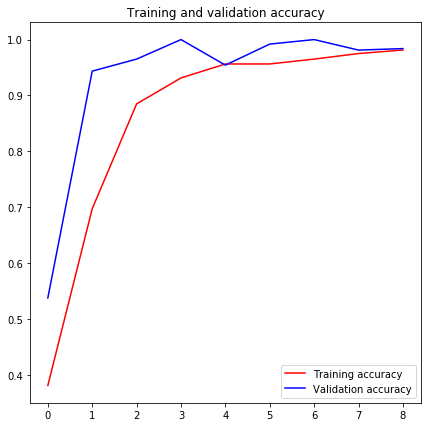

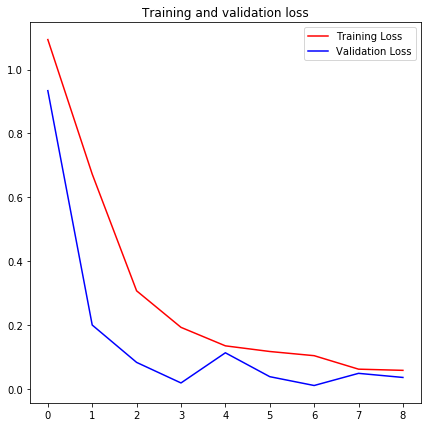

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Preparing the Test Data**

In [14]:
test_img = os.listdir(os.path.join(validation_dir))

test_df = pd.DataFrame({'Image': test_img})
test_df.head()

,Image
0,scissors-hires1.png
1,scissors-hires2.png
2,rock3.png
3,paper4.png
4,paper5.png


**Test Generator**

In [15]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    validation_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 33 validated image filenames.


In [16]:
predict = model.predict_generator(test_generator, steps = int(np.ceil(33/20)))

Instructions for updating:
Please use Model.predict, which supports generators.


In [17]:
# Identifying the classes

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [18]:
test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

test_df['Label'] = test_df['Label'].replace(label_map)

In [19]:
test_df.head()

,Image,Label
0,scissors-hires1.png,scissors
1,scissors-hires2.png,scissors
2,rock3.png,rock
3,paper4.png,paper
4,paper5.png,paper


In [20]:
test_df.Label.value_counts()

paper       11
scissors    11
rock        11
Name: Label, dtype: int64

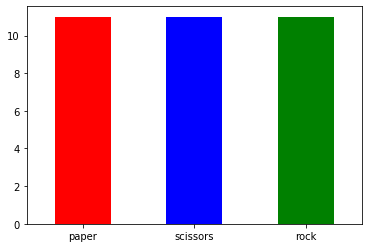

In [21]:
test_df.Label.value_counts().plot.bar(color = ['red','blue','green'])
plt.xticks(rotation = 0)
plt.show()

**Results of testing the model with unseen images**

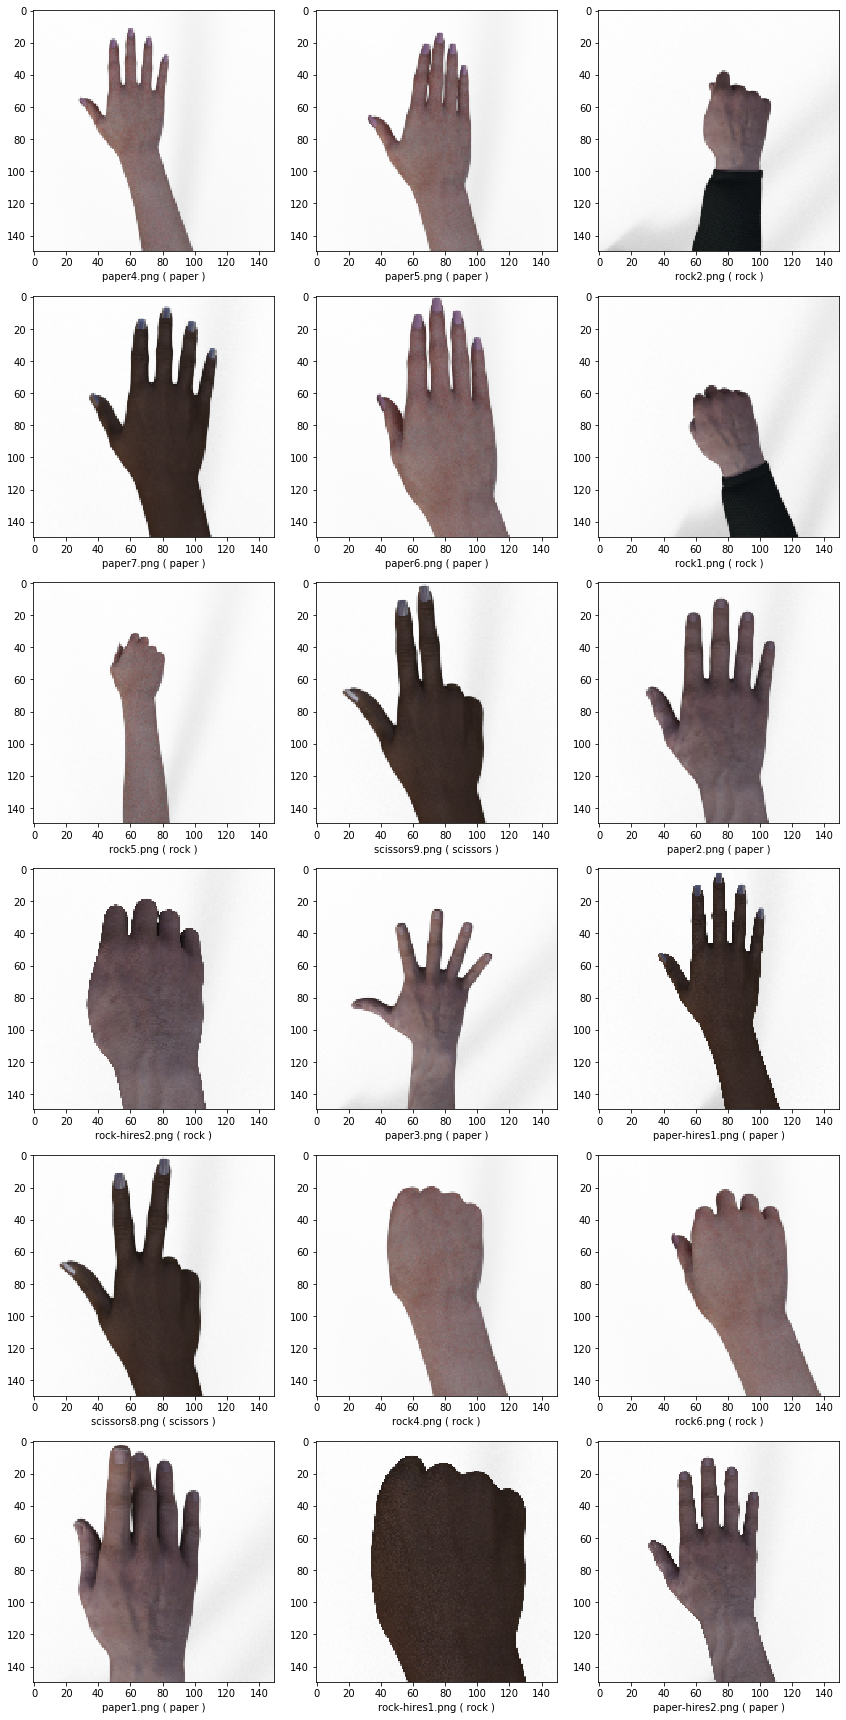

In [22]:
v = random.randint(0, 25)

sample_test = test_df.iloc[v:(v+18)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(validation_dir + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

In [23]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)

In [24]:
print("Accuracy of the model on test data is {:.2f}".format((sum(lis)/len(lis))*100))

Accuracy of the model on test data is 100.00
